In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import mylibrary.datasets as datasets
import mylibrary.splinelib as spline
import matplotlib
%matplotlib inline

(400, 2) (400, 1)


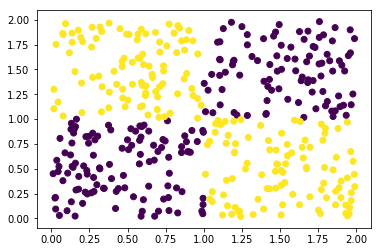

In [2]:
T = 1.
F = 0.

xxx = np.array([[F, F],
      [F, T],
      [T, F],
      [T, T],])
yyy = np.array([[F],[T],[T],[F]])

x = []
y = []
n_data = 400
for i in range(n_data):
    index = np.random.randint(low=0, high=4)
    xx = xxx[index] + np.random.uniform(low=0., high=1, size=xxx[0].size)
#     xx = xxx[index] + np.random.normal(loc=0., scale=0.21, size=xxx[0].size)
    x.append(xx)
    y.append(yyy[index])
x, y = np.array(x), np.array(y)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1))

In [3]:
colors = ['r', 'y', 'g', 'b']
h = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xxyy = np.c_[xx.ravel(), yy.ravel()]

In [4]:
input_size = 2
hidden_1 = 2
output_size = 1
learning_rate = 0.01

optimizer = tnn.SGD(learning_rate)
layer1 = tnn.LinearLayer(input_size, hidden_1, optimizer=optimizer)
layer2 = spline.SplineVectorLayer(hidden_1, max_points=3)  # 2 -> Linear; 3 -> DoubleRelu
# layer2 = tnn.DoubleReluLayer(hidden_1, optimizer=optimizer)
# layer2 = tnn.LeakyRelu()
layer3 = tnn.NonLinearLayer(hidden_1, output_size, activation=tnn.Sigmoid(), optimizer=optimizer)

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(20000):
    a1 = layer1.forward(x)
    a2 = layer2.forward(a1)
    yout = layer3.forward(a2)
    
    loss = tnn.CrossEntropyBinary.loss(yout, y)
    dy = tnn.CrossEntropyBinary.del_loss(yout, y)
    
    da2 = layer3.backward(dy)
    da1 = layer2.backward(da2)
    dx = layer1.backward(da1)

    layer1.update()
    layer2.update()
    layer3.update()
    
    if step % 100 == 0:
        layer2._maintain_good_spline_()
        
        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()

#         out = (yout>0.5).astype(int)
#         plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
#         plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))
        
        a1 = layer1.forward(xxyy)
        a2 = layer2.forward(a1)
        classxy = layer3.forward(a2)
        classxyi = (classxy > 0.5).astype(int)
        plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   alpha=0.5,
                   aspect='auto', origin='lower')
        plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')            
    
    
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.09302010958224503

_______________________
epoch 100
Loss 0.09178370415855273

_______________________
epoch 200
Loss 0.09067471399150126

_______________________
epoch 300
Loss 0.08966091839529763

_______________________
epoch 400
Loss 0.08871764418478058

_______________________
epoch 500
Loss 0.08785505447835298

_______________________
epoch 600
Loss 0.08710608950153556

_______________________
epoch 700
Loss 0.08642480896115674

_______________________
epoch 800
Loss 0.08579584679027283

_______________________
epoch 900
Loss 0.08519845818549383

_______________________
epoch 1000
Loss 0.08463738621759109

_______________________
epoch 1100
Loss 0.08409686051611603

_______________________
epoch 1200
Loss 0.08357662936955068

_______________________
epoch 1300
Loss 0.08307454617643463

_______________________
epoch 1400
Loss 0.08259350215025062

_______________________
epoch 1500
Loss 0.08212725067096127

_______________________
epoch 1600
L

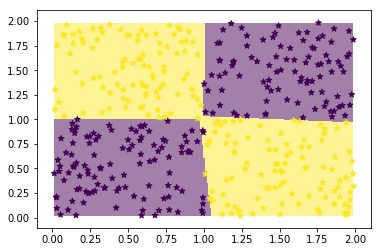

In [6]:
%matplotlib inline
a1 = layer1.forward(xxyy)
a2 = layer2.forward(a1)
classxy = layer3.forward(a2)
classxyi = (classxy > 0.5).astype(int)
plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           alpha=0.5,
           aspect='auto', origin='lower')
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')  

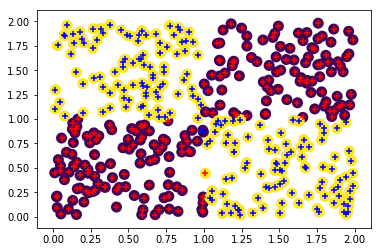

In [7]:
a1 = layer1.forward(x)
a2 = layer2.forward(a1)
yout = layer3.forward(a2)
out = (yout>0.5).astype(int)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

In [8]:
i=-1
layer3.input.shape

(400, 2)

(0.0006424497408328159, 0.0023895117668965727)

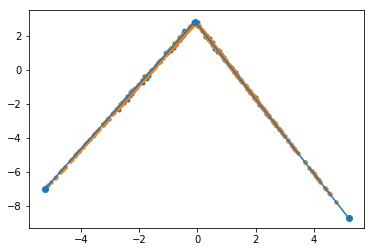

In [9]:
i+=1
a1 = layer2.input
a2 = layer3.input
da2 = layer2.del_output
a2_ = a2 - da2
plt.scatter(a1[:, i], a2_[:, i], marker='.')
plt.scatter(a1[:, i], a2[:, i], marker='.')
plt.plot(layer2.spline_list[i].X,  layer2.spline_list[i].Y, marker='o')
da2[:,i].mean(), da2[:,i].var()

In [10]:
da2.mean(axis=0)

array([ 0.00064245, -0.00066891])

In [11]:
da2.std(axis=0)

array([0.04888263, 0.05089579])

In [12]:
layer2._increase_pieces_()